In [2]:
# object detection in live data 
import cv2
import matplotlib.pyplot as plt


In [3]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model ='frozen_inference_graph.pb'

In [4]:
model = cv2.dnn_DetectionModel(frozen_model,  config_file) 

In [5]:
classLabels = []
file_names = 'labels.txt'
with open(file_names, 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

In [6]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [15]:
model.setInputSize(320, 320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5, 127,5, 127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 0000020DD6B95750>

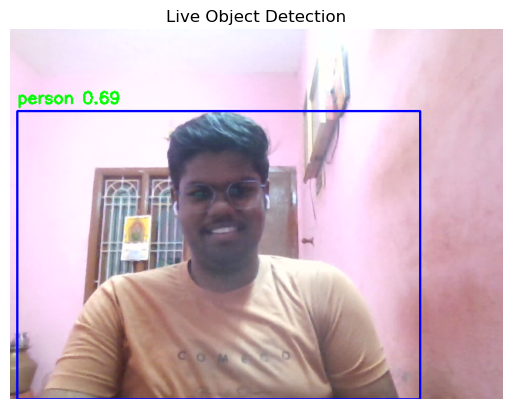

In [ ]:
import cv2
import time
from matplotlib import pyplot as plt
from IPython.display import clear_output

cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        frame_resized = cv2.resize(frame, (640, 480))

        # Object detection
        classIndex, confidence, bbox = model.detect(frame_resized, confThreshold=0.5)

        if len(classIndex) != 0:
            for classInd, conf, boxes in zip(classIndex.flatten(), confidence.flatten(), bbox):
                if 1 <= classInd <= len(classLabels) and conf > 0.5:
                    label = classLabels[classInd - 1]
                    x, y, w, h = boxes
                    cv2.rectangle(frame_resized, (x, y), (x + w, y + h), (255, 0, 0), 2)
                    cv2.putText(frame_resized, f"{label} {conf:.2f}", (x, y - 10), 
                                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

        # Convert to RGB for matplotlib display
        frame_rgb = cv2.cvtColor(frame_resized, cv2.COLOR_BGR2RGB)

        # Show frame
        clear_output(wait=True)
        plt.imshow(frame_rgb)
        plt.axis('off')
        plt.title("Live Object Detection")
        plt.show()

        # Pause a bit to simulate video effect (optional)
        time.sleep(0.05)

except KeyboardInterrupt:
    print("Stopped by user.")

cap.release()
